In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline
 
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv('/content/drive/My Drive/ML/bike_haring_demand/train.csv', parse_dates = ['datetime'])
train.shape

(10886, 12)

In [4]:
# train.columns
# train.dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

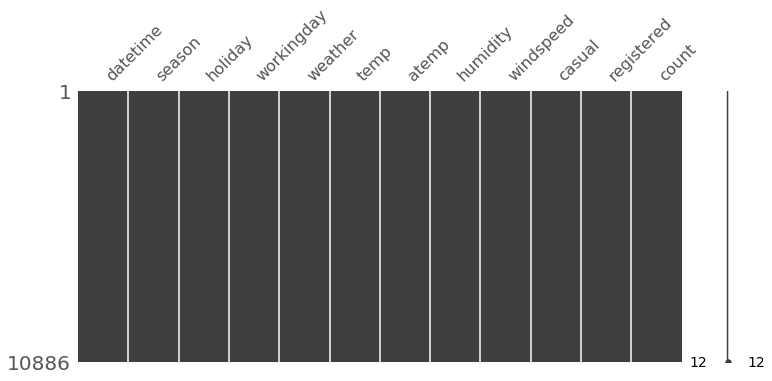

In [9]:
import missingno as msno

msno.matrix(train, figsize = (12, 5))

In [10]:
train["year"] = train['datetime'].dt.year
train["month"] = train['datetime'].dt.month
train["day"] = train['datetime'].dt.day
train["hour"] = train['datetime'].dt.hour
train["minute"] = train['datetime'].dt.minute
train["second"] = train['datetime'].dt.second
train.shape


(10886, 18)

In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [13]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null

In [0]:
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

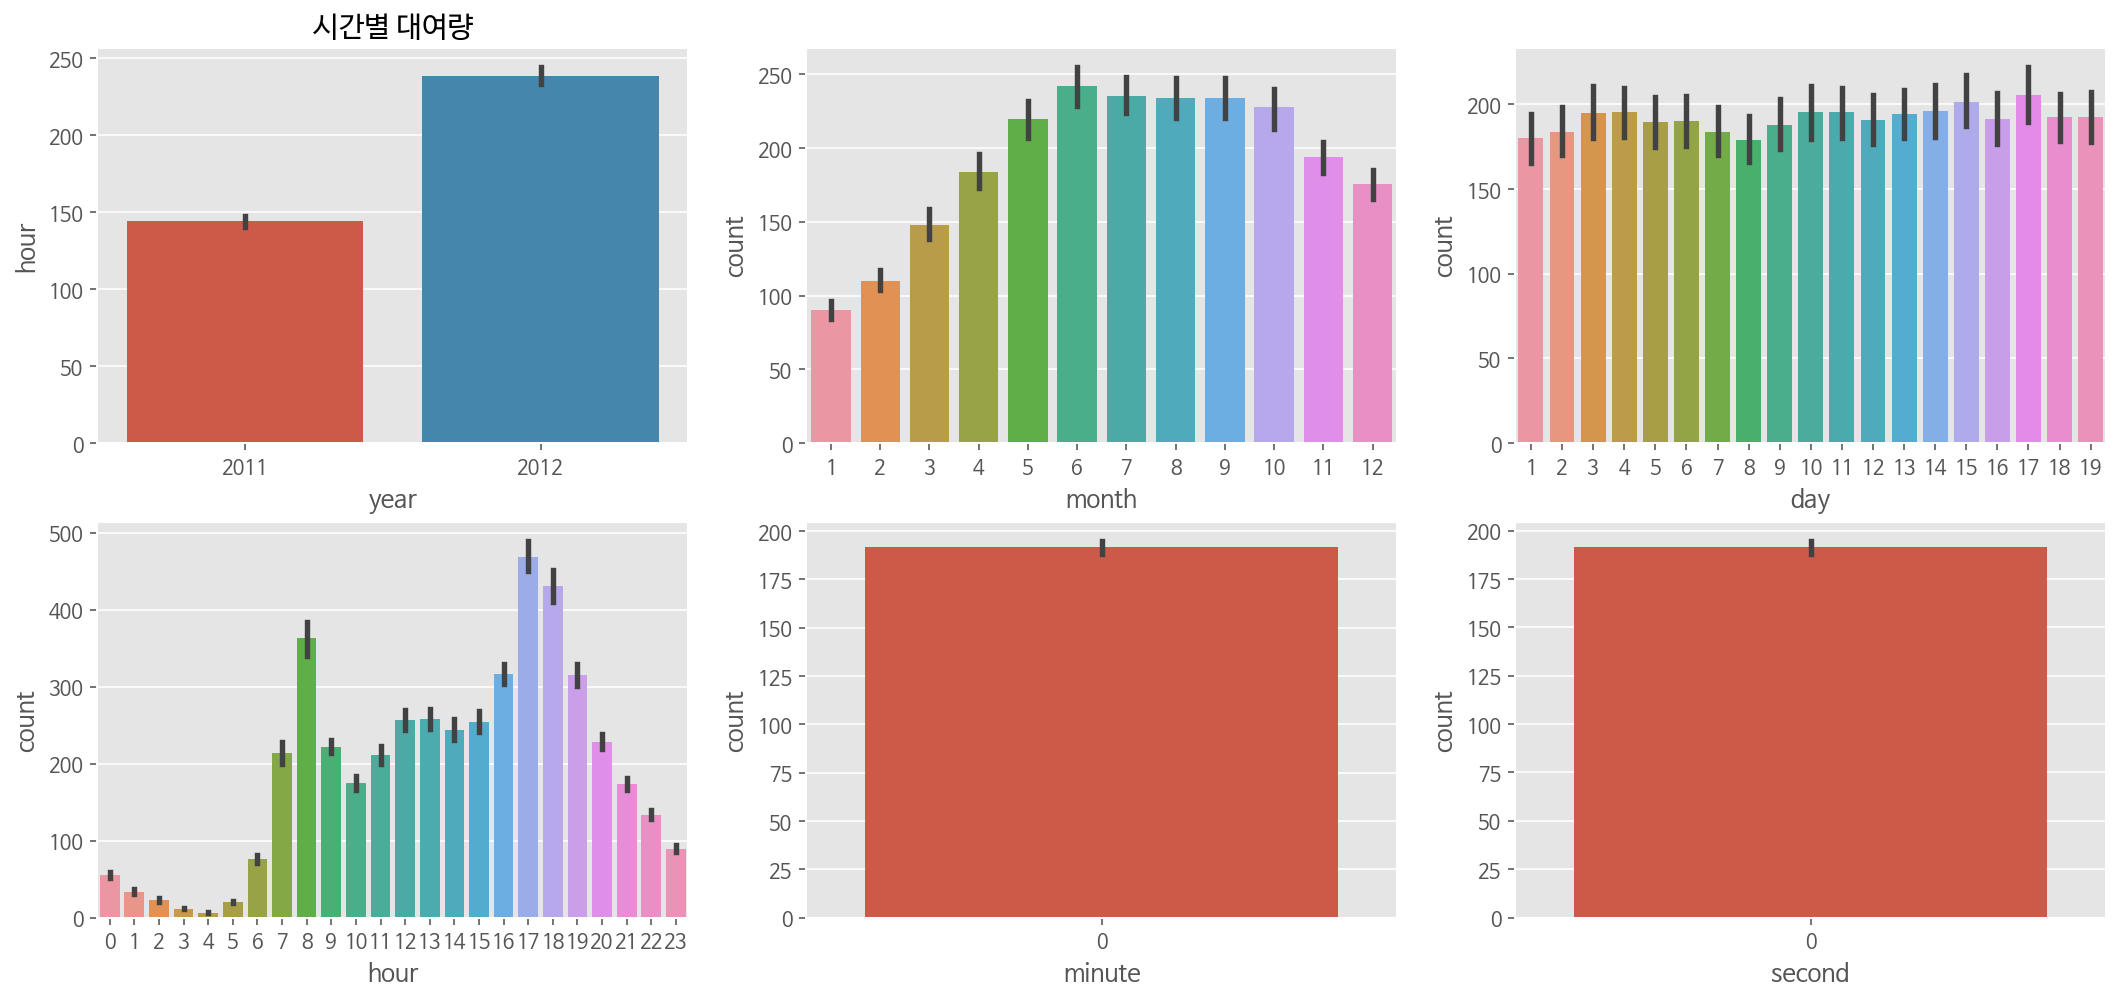

In [16]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18, 8)

sns.barplot (data= train, x = 'year', y= 'count', ax = ax1)
sns.barplot (data= train, x = 'month', y= 'count', ax = ax2)
sns.barplot (data= train, x = 'day', y= 'count', ax = ax3)
sns.barplot (data= train, x = 'hour', y= 'count', ax = ax4)
sns.barplot (data= train, x = 'minute', y= 'count', ax = ax5)
sns.barplot (data= train, x = 'second', y= 'count', ax = ax6)

ax1.set(ylabel = 'Count', title = '연도별 대여량')
ax1.set(ylabel = 'month', title = '월별 대여량')
ax1.set(ylabel = 'day', title = '일별 대여량')
ax1.set(ylabel = 'hour', title = '시간별 대여량')

- 연도별 대여량은 2011년보다 2012년이 더 많다.
- 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
- 일별대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
- 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.
- 분, 초도 다 0이기 때문에 의미가 없다.


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

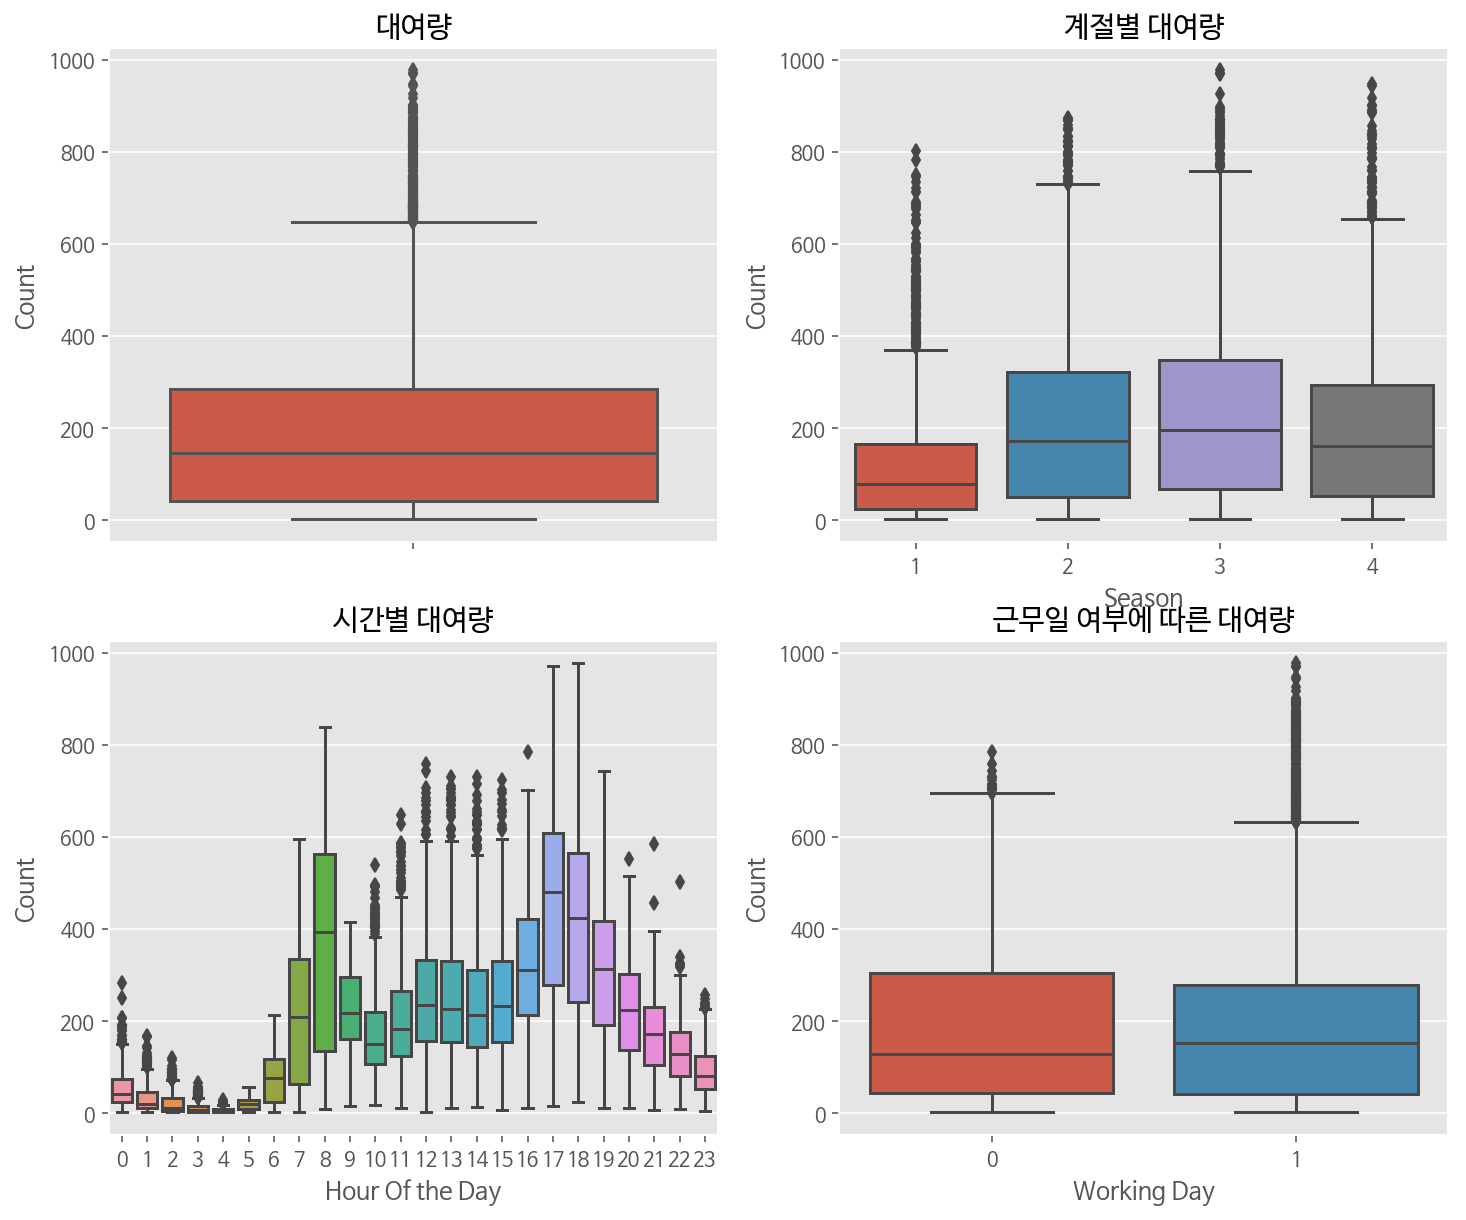

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12, 10)
sns.boxplot(data = train, y= 'count', orient = 'v', ax = axes[0][0])
sns.boxplot(data = train, y ='count', x = 'season', orient = 'v', ax = axes[0][1])
sns.boxplot(data = train, y ='count', x = 'hour', orient = 'v', ax = axes[1][0])
sns.boxplot(data = train, y ='count', x = 'workingday', orient = 'v', ax = axes[1][1])

axes[0][0].set(ylabel = 'Count', title = '대여량')
axes[0][1].set(xlabel = 'Season', ylabel = 'Count', title = '계절별 대여량')
axes[1][0].set(xlabel = 'Hour Of the Day', ylabel = 'Count', title = '시간별 대여량')
axes[1][1].set(xlabel = 'Working Day', ylabel = 'Count', title = '근무일 여부에 따른 대여량')

In [18]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [19]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

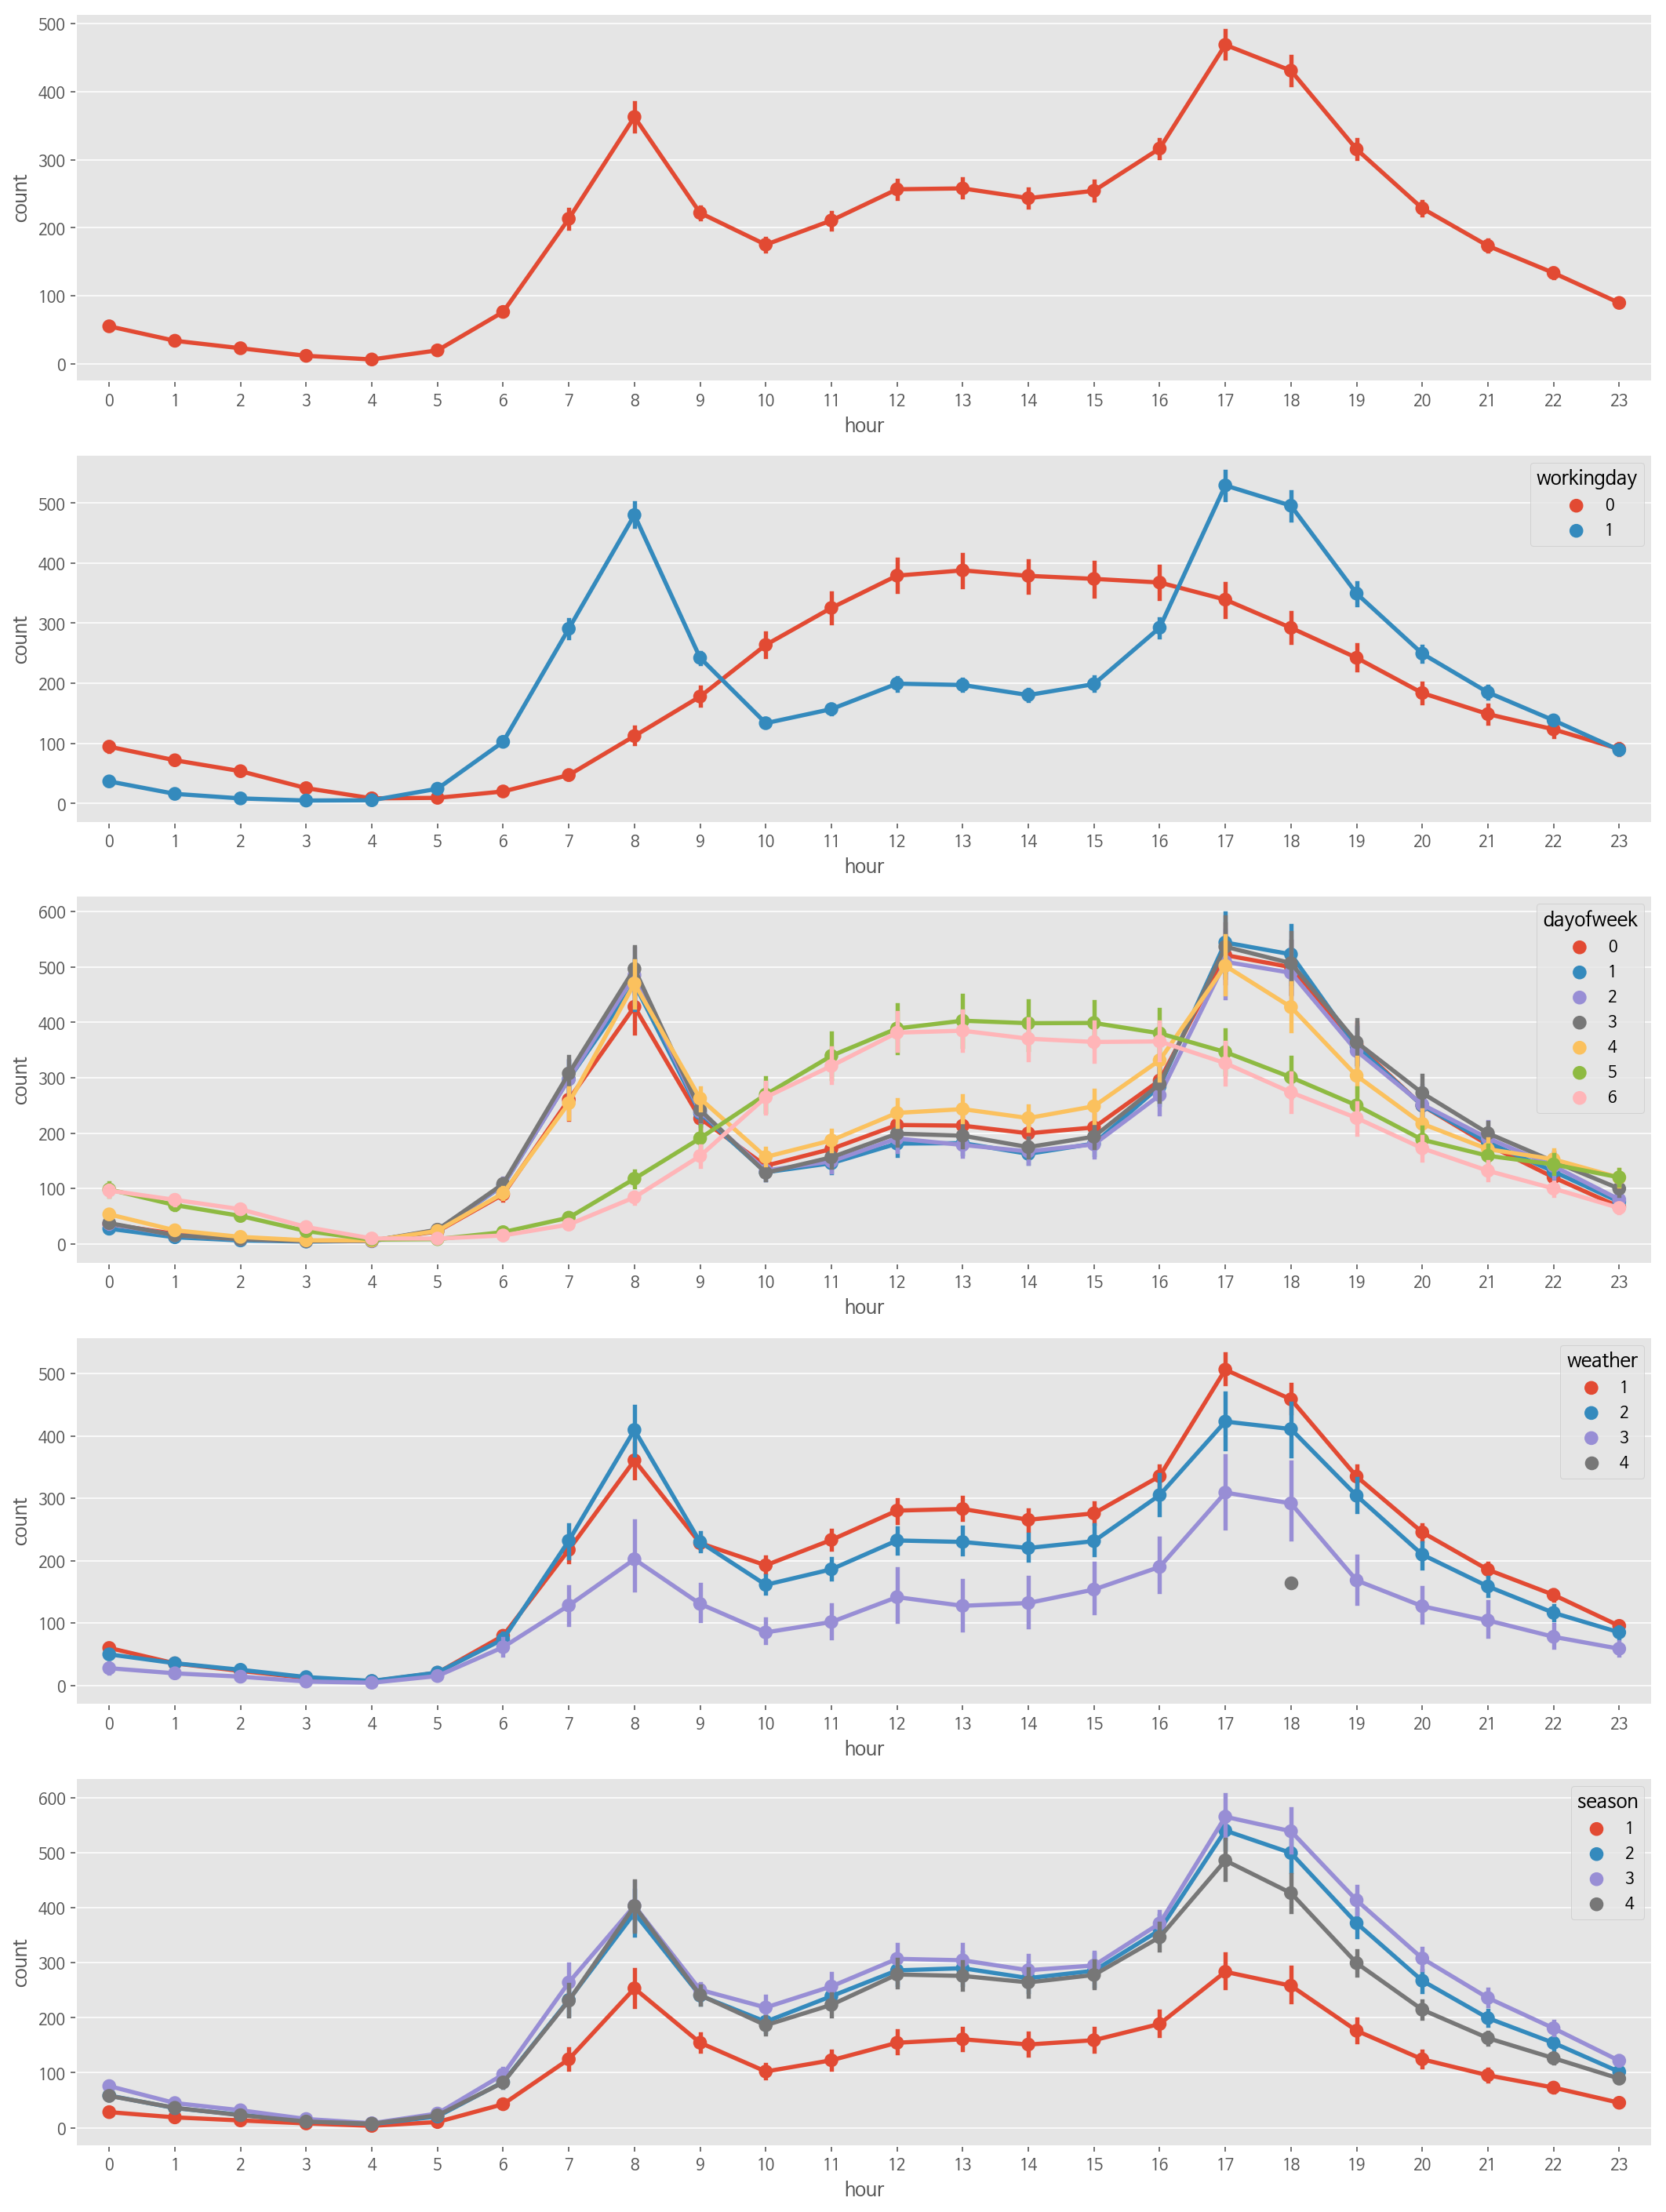

In [20]:
fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18, 25)

sns.pointplot(data = train, x= 'hour', y = 'count', ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax3)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax4)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax5)

In [24]:
corrMatt = train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


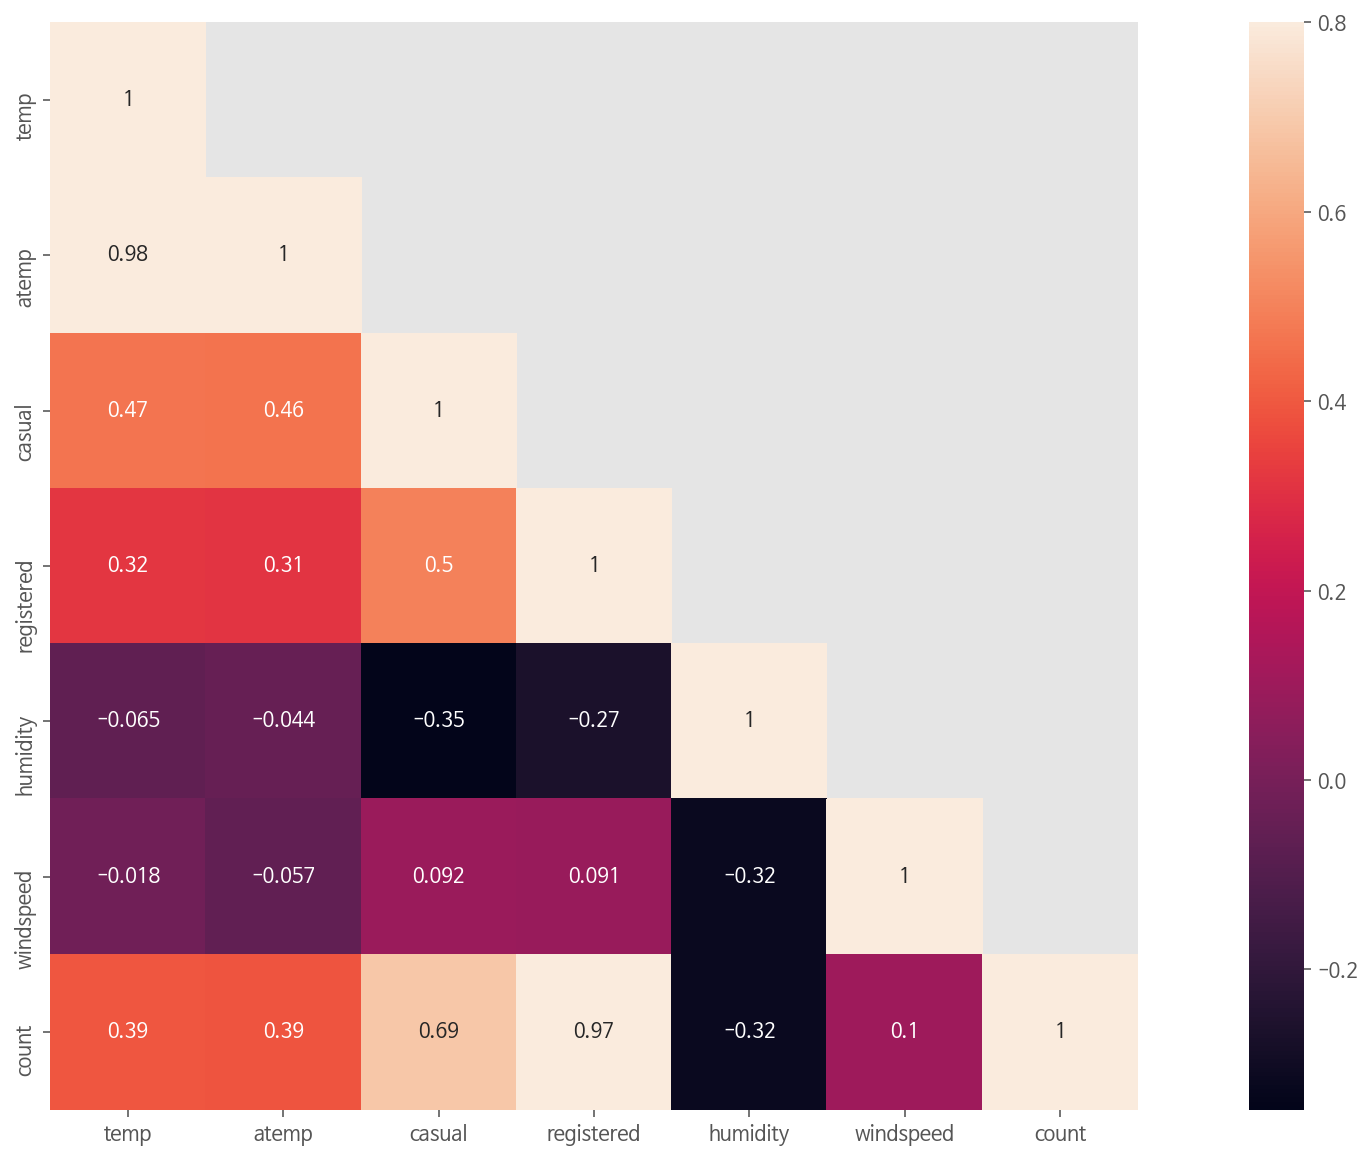

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask = mask, vmax=.8, square = True, annot = True)

- 온도, 습도, 풍속은 거의 연관관계가 없다.
- 대여량과 가장 연관이 높은 건 registered로 등록된 대여자가 많지만, test데이터에는 이 값이 없다.
- atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.

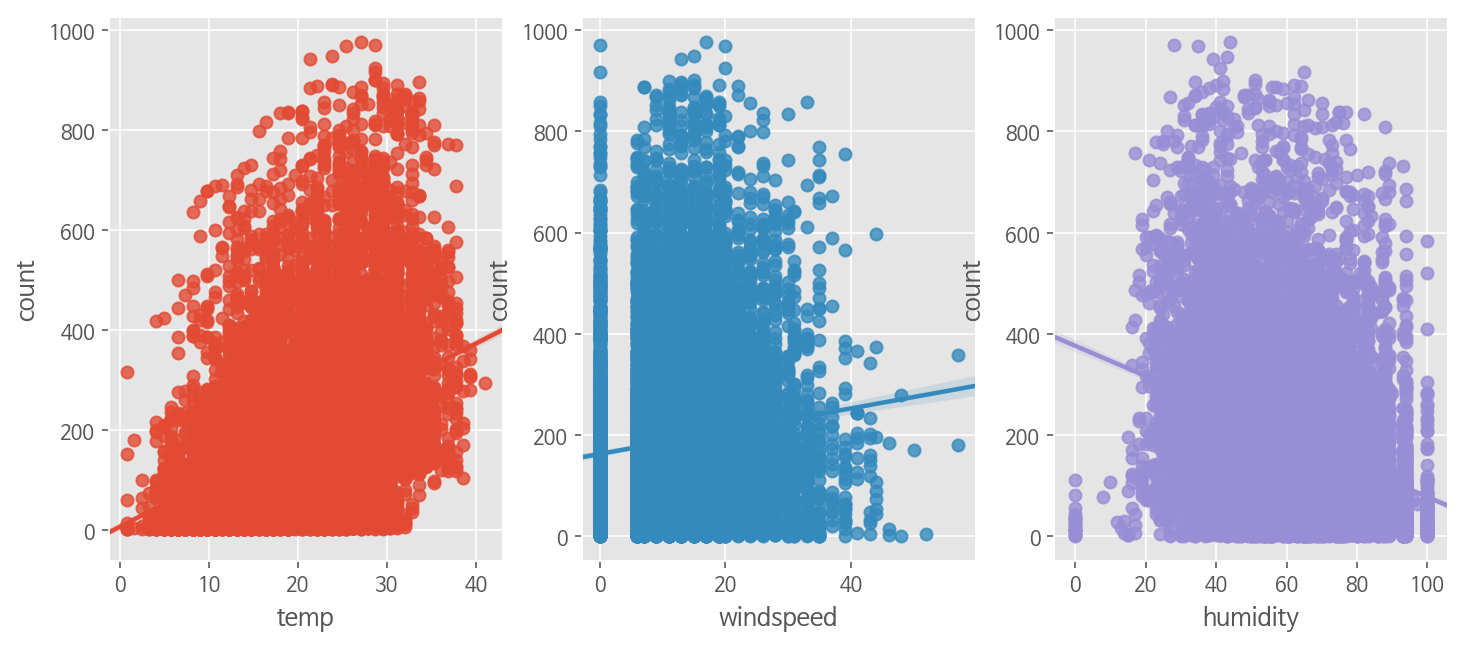

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)
sns.regplot(x = 'temp', y = 'count', data = train, ax = ax1)
sns.regplot(x = 'windspeed', y = 'count', data = train, ax = ax2)
sns.regplot(x = 'humidity', y = 'count', data = train, ax = ax3)

- 풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다. 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측

In [28]:
def concatenate_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


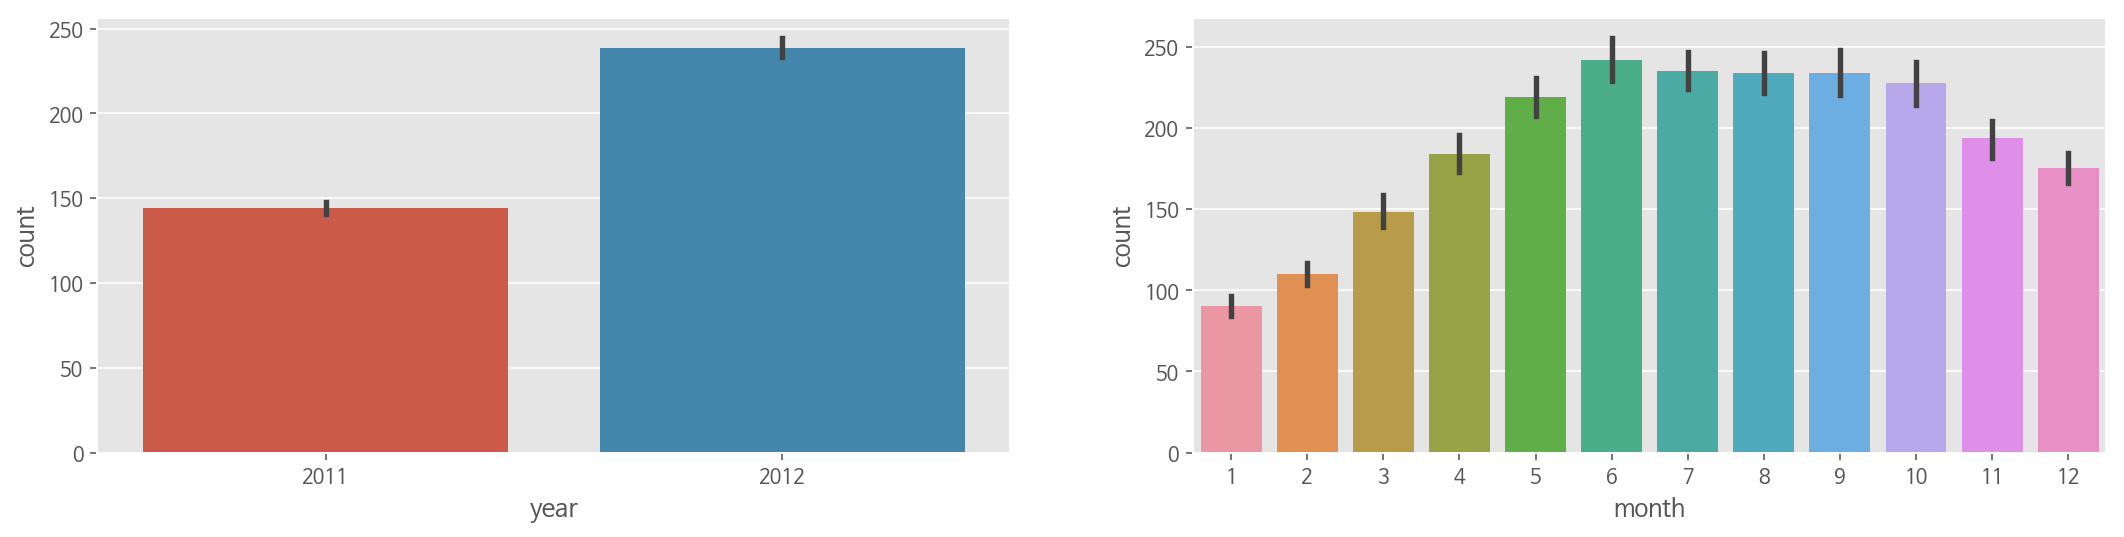

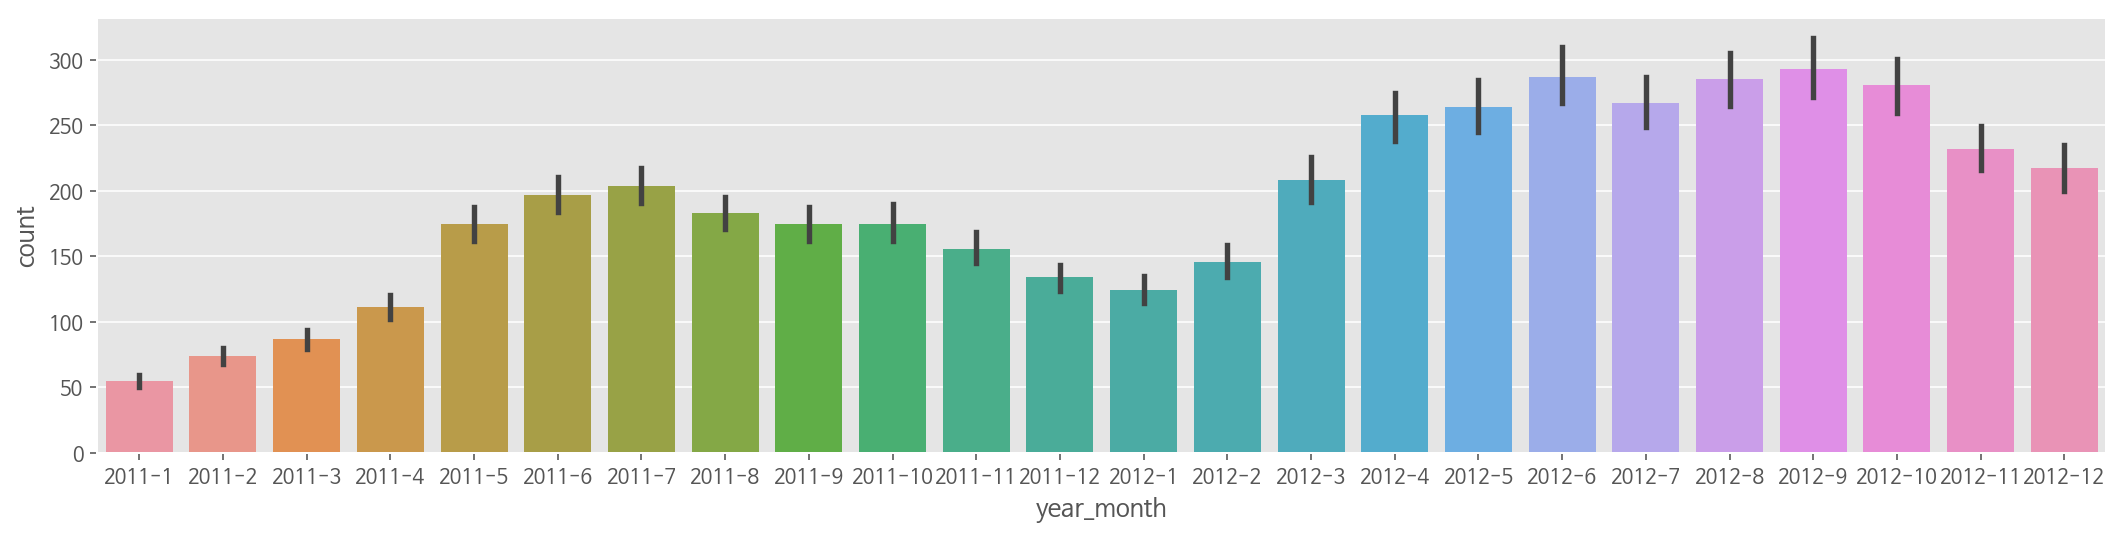

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18, 4)

sns.barplot(data= train, x = 'year', y = 'count', ax = ax1)
sns.barplot(data =train, x = 'month', y = 'count', ax = ax2)

fig, ax3 = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = 'year_month', y = 'count', ax = ax3)

- 2011년보다 2012년의 대여량이 더 많다.
- 겨울보다는 여름에 대여량이 많다.
- 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.


In [33]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3* train['count'])]

print(train.shape)
print(trainWithoutOutliers.shape)


(10886, 20)
(8001, 20)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.8918203 , 3.8918203 , 3.8918203 , ..., 6.87626461, 6.87832647,
         6.88550967])),
 (0.6811413933668111, 5.319241302387579, 0.9926479860119485))

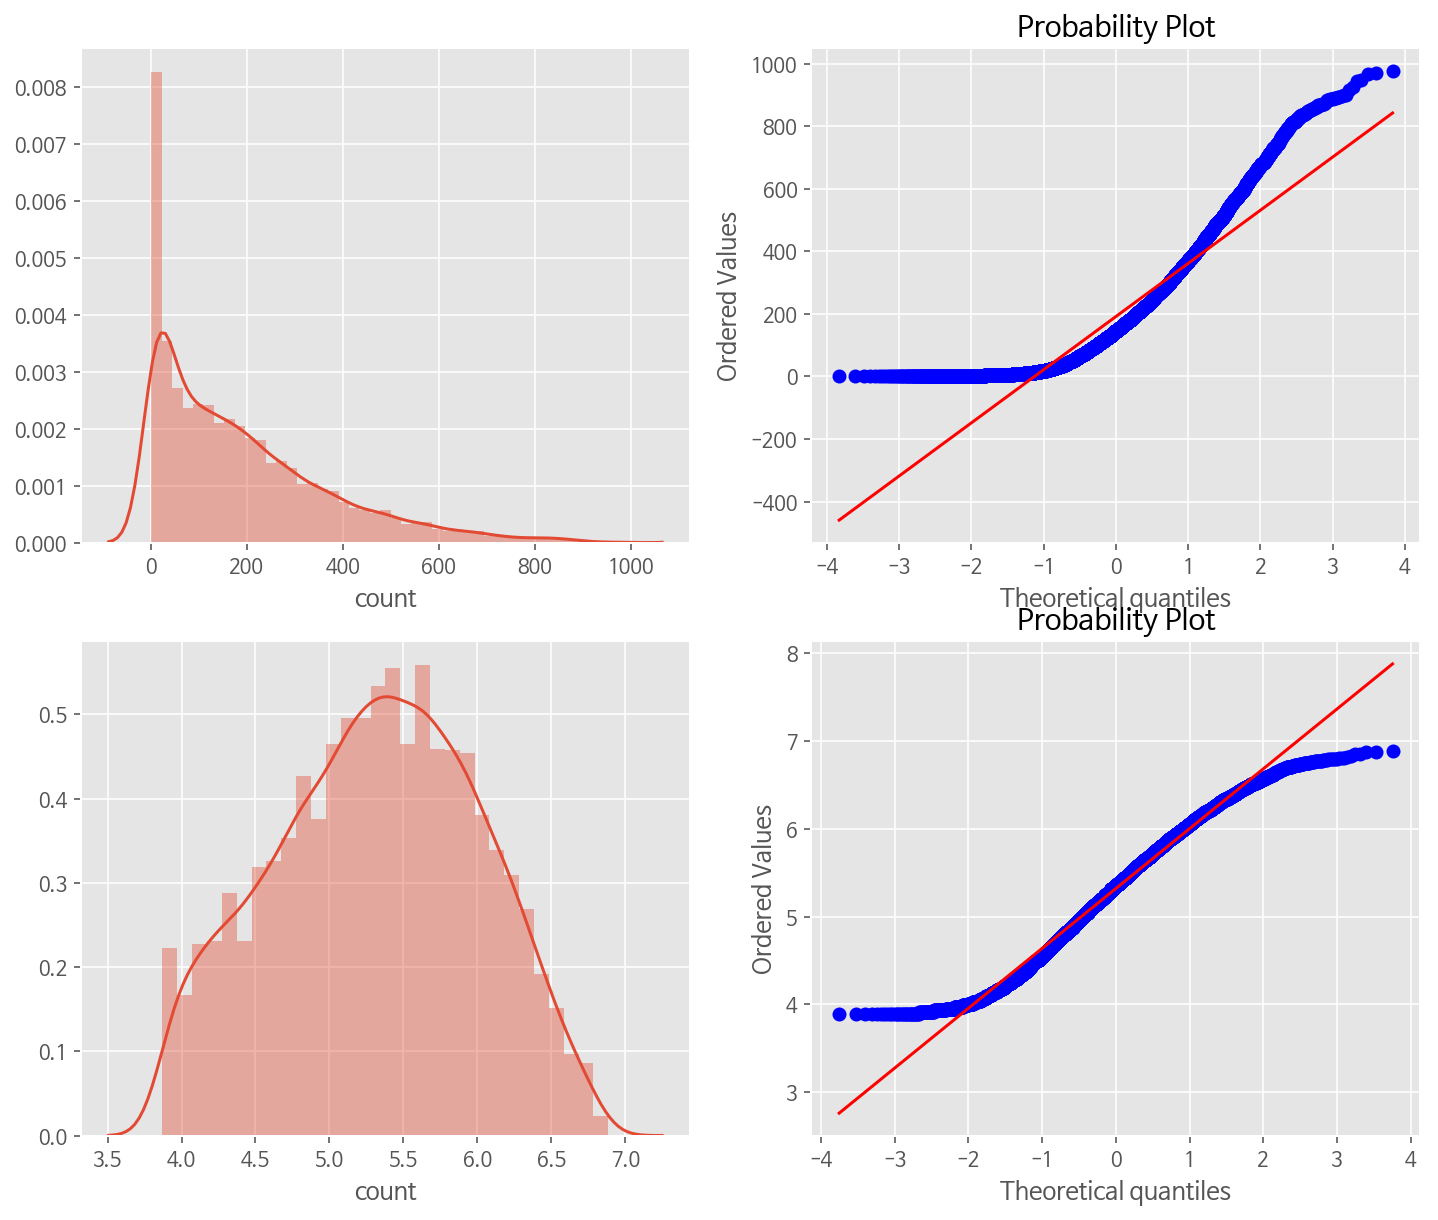

In [35]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols = 2, nrows = 2)
figure.set_size_inches(12, 10)

sns.distplot(train['count'], ax = axes[0][0])
stats.probplot(train['count'], dist = 'norm', fit = True, plot = axes[0][1])
sns.distplot(np.log(trainWithoutOutliers['count']), ax = axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist = 'norm', fit = True, plot = axes[1][1])